In [1]:
from poly_torch import PolynomialLayer
import torch
import torch.nn as nn
import numpy as np
from torch.nn.modules import Module
from torch._jit_internal import weak_module, weak_script_method
from torch.nn.parameter import Parameter
from torch.nn.modules.linear import init
from math import sqrt
import torch.nn.functional as F
import torch.optim
from tqdm import tqdm_notebook as tqdm
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

we perform a polynomial regression by training the nn poly :

In [2]:
poly = PolynomialLayer(degree=2, inp_size=1, out_size=1)

initialisation of the target polynomial : target_polynomial is 2 X^2 + 3 X + 1

In [3]:
target_polynomial = PolynomialLayer(degree=2,inp_size=1, out_size=1)

target_polynomial.coeff_deg_0 = Parameter(torch.tensor([1.0]))
target_polynomial.coeff_deg_1 = Parameter(torch.tensor([3.0]))
target_polynomial.coeff_deg_2 = Parameter(torch.tensor([2.0]))

we build the data we'll use to train poly :

In [4]:
training = []

for i in range(10000):
    v = 10.0 * torch.rand(1)
    training.append((v, target_polynomial(v) + 5.0 * torch.rand(1) -2.5))

first, let's try to train poly without normalization.

As one can see, this causes the parameters of poly to overflow :

In [17]:
poly.fit_to_training(training=training, optimizer=torch.optim.SGD(poly.parameters(),lr=1.0), normalize=False)

print([param.item() for param in poly.parameters()])

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:10<00:00, 943.10it/s]


[nan, nan, nan]


Now, we use normalization :

In [5]:
#poly.reset_parameters()

poly.fit_to_training(training=training, optimizer=torch.optim.SGD, lr=0.01, normalize=True)

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:13<00:00, 747.23it/s]


Let's see how well we did :

We plot a scatter view of our training data (in blue), and the prediction made by the nn poly (in red) :

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


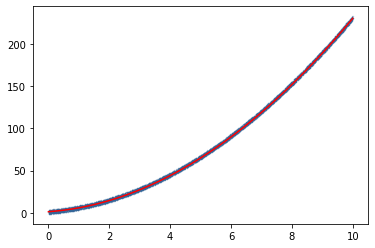

In [6]:
training_x = [x.item() for (x,y) in training]
training_y = [y.item() for (x,y) in training]
t = np.linspace(0,10,1000)
network_predictions = [poly(torch.tensor([x])) for x in t]
plt.scatter(training_x,training_y,s=0.1,c=(0.2,0.4,0.6,0.5)) #a scatter view of our training set
plt.plot(t,network_predictions,'r')
plt.show()